Re-create the following figure using the `mpg` data set.

<img src="figs/example.png" style="width: 600px;" />

Hints:
- you can make a table with median values using `group_by` and `summarize`
- use `geom_crossbar` to create the vertical line for median values
- use `fct_reorder` to set the levels for `class`

In [2]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



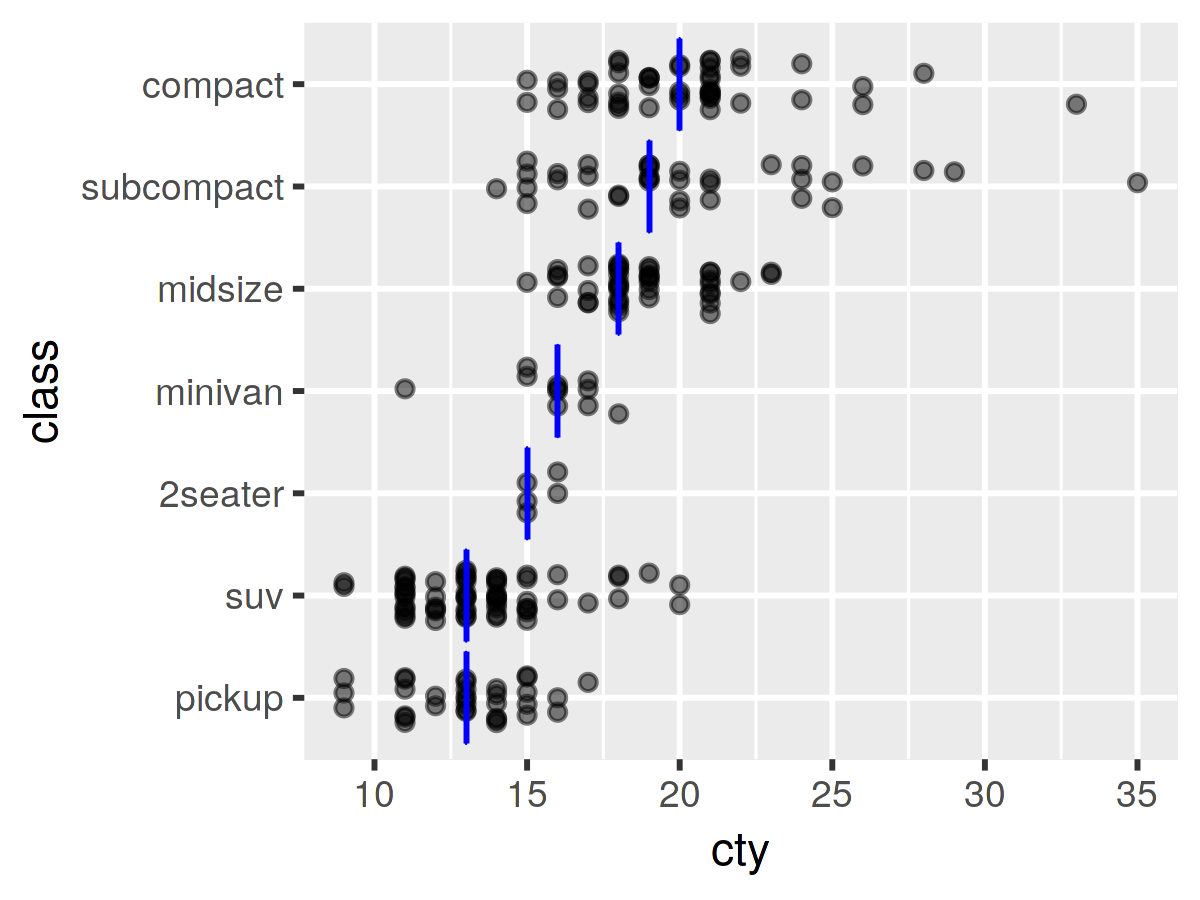

In [8]:
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res=300)

mpg = mpg %>%
    mutate(class = fct_reorder(class, cty, median))

mpg.cty.median = mpg %>%
    group_by(class) %>%
    summarize(cty = median(cty))

p = ggplot(mpg, aes(x=class, y=cty))
p = p + geom_point(position = position_jitter(h=0,w=0.25),alpha = 0.5)
p = p + geom_crossbar(data=mpg.cty.median, color='blue', size=0.20, aes(ymin = cty, ymax = cty))
p = p + coord_flip()
p